In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

from scipy.optimize import curve_fit

import time

import os

# Data files

In [17]:
file_dir_15g = "data/13-11/1.5g"
file_names_15g = [
    "1.5g@15Hz.csv",
    "1.5g@18Hz.csv",
    "1.5g@20Hz.csv",
    "1.5g@22Hz.csv",
    "1.5g@24Hz.csv",
    "1.5g@26Hz.csv",
    "1.5g@28Hz.csv",
    "1.5g@30Hz.csv",
    "1.5g@32Hz.csv",
    "1.5g@34Hz.csv",
    "1.5g@36Hz.csv",
    "1.5g@38Hz.csv",
    "1.5g@40Hz.csv",
]

file_dir_125g = "data/13-11/1.25g"
file_names_125g = [
    "1.25g@15Hz.csv",
    "1.25g@20Hz.csv",
    "1.25g@22Hz.csv",
    "1.25g@24Hz.csv",
    "1.25g@26Hz.csv",
    "1.25g@28Hz.csv",
    "1.25g@30Hz.csv",
    "1.25g@32Hz.csv",
    "1.25g@34Hz.csv",
]


file_dir_175g = "data/13-11/1.75g"
file_names_175g = [
    "1.75g@15Hz.csv",
    "1.75g@18Hz.csv",
    "1.75g@20Hz.csv",
    "1.75g@22Hz.csv",
    "1.75g@24Hz.csv",
    "1.75g@26Hz.csv",
    "1.75g@28Hz.csv",
    "1.75g@30Hz.csv",
    "1.75g@32Hz.csv",
    "1.75g@34Hz.csv",
]



In [14]:
frequencies_15g = [15, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
vx_all_15g = []
vy_all_15g = []
v_avg_15g = []

for i in range(len(file_names_15g)):
    file_path = os.path.join(file_dir_15g, file_names_15g[i])
    df = pd.read_csv(file_path)
    vx = df['vx'].to_numpy()
    vy = df['vy'].to_numpy()
    vx_all_15g.append(vx)
    vy_all_15g.append(vy)
    v = np.sqrt(vx**2 + vy**2)
    v_avg_15g.append(np.mean(v))
    #if i==0: print(df['vx'])
    #print(i)


In [23]:
frequencies_125g = [15, 20, 22, 24, 26, 28, 30, 32, 34]
vx_all_125g = []
vy_all_125g = []
v_avg_125g = []

print(len(frequencies_125g) == len(file_names_125g))

for i in range(len(file_names_125g)):
    file_path = os.path.join(file_dir_125g, file_names_125g[i])
    df = pd.read_csv(file_path)
    vx = df['vx'].to_numpy()
    vy = df['vy'].to_numpy()
    vx_all_125g.append(vx)
    vy_all_125g.append(vy)
    v = np.sqrt(vx**2 + vy**2)
    v_avg_125g.append(np.mean(v))
    #if i==0: print(df['vx'])
    #print(i)

True


In [30]:
frequencies_175g = [15, 18, 20, 22, 24, 26, 28, 30, 32, 34]
vx_all_175g = []
vy_all_175g = []
v_all_175g = []
v_avg_175g = []

print(len(frequencies_175g) == len(file_names_175g))

for i in range(len(file_names_175g)):
    file_path = os.path.join(file_dir_175g, file_names_175g[i])
    df = pd.read_csv(file_path)
    vx = df['vx'].to_numpy()
    vy = df['vy'].to_numpy()
    vx_all_175g.append(vx)
    vy_all_175g.append(vy)
    v = np.sqrt(vx**2 + vy**2)
    v_all_175g.append(v)
    v_avg_175g.append(np.mean(v))
    #if i==0: print(df['vx'])
    #print(i)

True


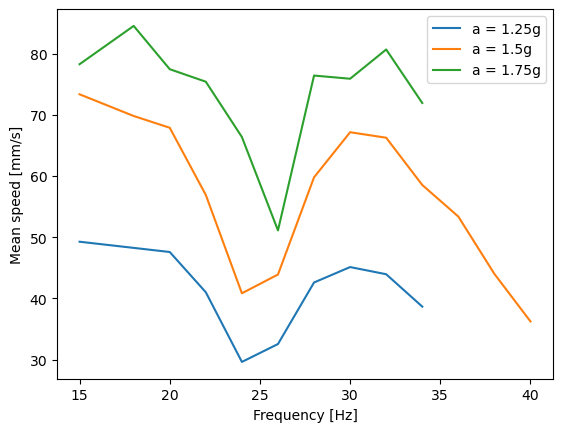

In [26]:
plt.plot(frequencies_125g, v_avg_125g, label="a = 1.25g")
plt.plot(frequencies_15g, v_avg_15g, label="a = 1.5g")
plt.plot(frequencies_175g, v_avg_175g, label="a = 1.75g")

'''plt.scatter(frequencies_125g, v_avg_125g, label="a = 1.25g") #unreadable
plt.scatter(frequencies_15g, v_avg_15g, label="a = 1.5g")
plt.scatter(frequencies_175g, v_avg_175g, label="a = 1.75g")'''

plt.xlabel("Frequency [Hz]")
plt.ylabel("Mean speed [mm/s]")
plt.legend()
plt.show()

# Plot distribution

1.75g @ 18Hz

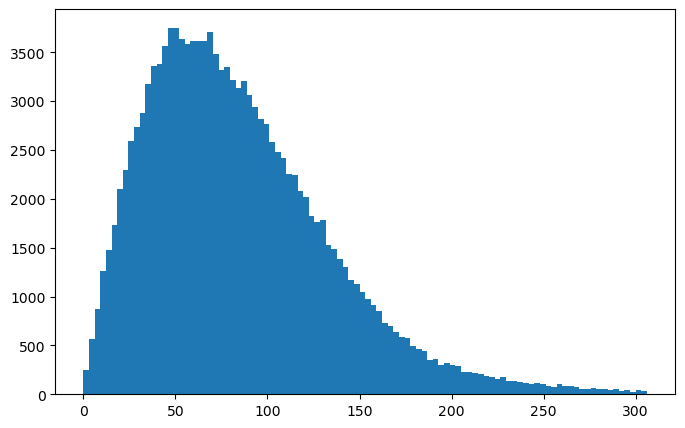

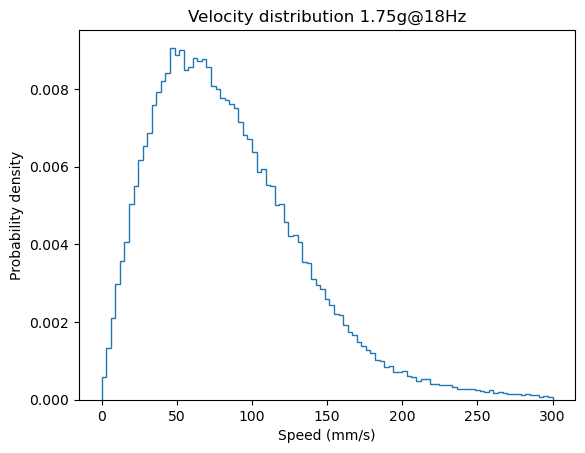

In [ ]:
#file_path_175g18Hz = "data/13-11/1.75g/1.75g@18Hz.csv"

#df = pd.read_csv(file_path)
vx = vx_all_175g[1]
vy = vy_all_175g[1]
v = v_all_175g[1]

plt.figure(figsize=(8,5))
plt.hist(v, bins=100)
plt.show()
# make histogram

bins_speed = np.linspace(0, 300, 100)
density_speed, bins_speed = np.histogram(v, bins=bins_speed, density=True)
plt.stairs(density_speed, bins_speed)
plt.ylabel("Probability density")
plt.xlabel("Speed (mm/s)")
plt.title("Velocity distribution 1.75g@18Hz")
plt.show()

speed_space = np.array([(bins_speed[i-1]+bins_speed[i])/2 for i in range(1, len(bins_speed))])
plt.scatter(speed_space, density_speed, s=10)